In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

In [9]:
# Load datasets for USA, AUS, and INDIA
df_usa = pd.read_csv('database_USA.csv')
df_aus = pd.read_csv('database_AUS.csv')
df_india = pd.read_csv('database_IND.csv')

# Combine datasets
df_combined = pd.concat([df_usa, df_aus, df_india], ignore_index=True)

df_combined.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,USA,United States of America,10 Briggs Solar NG LLC (East),USA0062781,0.0,41.6327,-71.4963,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.467,U.S. Energy Information Administration,NaN
2,USA,United States of America,1001 Ebenezer Church Solar,USA0063444,0.0,36.2838,-80.8434,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,United States of America,1008 Matthews Solar,USA0063447,0.0,36.2167,-80.5525,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,United States of America,1009 Yadkin Solar,USA0063445,0.0,36.1475,-80.6561,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Statistical Matrix

In [10]:
# Data preparation (handling missing values, data types, etc.)
df_combined['commissioning_year'] = pd.to_numeric(df_combined['commissioning_year'], errors='coerce', downcast='integer')
df_combined['capacity_mw'] = pd.to_numeric(df_combined['capacity_mw'], errors='coerce')

# Drop rows with NaN values (optional, depending on your data strategy)
df_combined.dropna(subset=['commissioning_year', 'capacity_mw'], inplace=True)

In [11]:
df_combined.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,10648.0,142.689833,379.869467,0.0200,2.900000,10.000000,80.000000,6809.0000
latitude,10613.0,36.363592,13.050278,-42.8415,34.509400,38.971700,42.293300,71.2920
longitude,10613.0,-79.750762,55.049282,-171.7124,-106.644000,-88.230600,-76.183000,153.4341
commissioning_year,10648.0,1998.181533,24.023165,1896.0000,1988.000000,2008.000000,2015.000000,2020.0000
wepp_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,10605.0,2019.000000,0.000000,2019.0000,2019.000000,2019.000000,2019.000000,2019.0000
generation_gwh_2013,6570.0,562.134455,2033.024754,-947.6000,1.806682,21.656500,185.879002,31431.0800
generation_gwh_2014,7130.0,635.291414,2200.810775,-989.6190,2.136250,22.375500,215.236250,32320.9170
generation_gwh_2015,7612.0,617.846302,2155.922158,-864.4280,2.233750,19.504000,198.818000,32525.5950
generation_gwh_2016,8365.0,560.457260,2052.982209,-768.6200,2.183000,15.410278,172.281000,32377.4770


* In above description, there are no use and repetition data in column like --wepp_id, year_of_capacity_data, estimated_generation_gwh
* So, I am removing those column

In [13]:
df_combined.drop(columns=['wepp_id'],axis=1,inplace=True)
df_combined.drop(columns=['year_of_capacity_data'],axis=1,inplace=True)
df_combined.drop(columns=['estimated_generation_gwh'],axis=1,inplace=True)

In [14]:
df_combined.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,10648.0,142.689833,379.869467,0.0200,2.900000,10.000000,80.000000,6809.0000
latitude,10613.0,36.363592,13.050278,-42.8415,34.509400,38.971700,42.293300,71.2920
longitude,10613.0,-79.750762,55.049282,-171.7124,-106.644000,-88.230600,-76.183000,153.4341
commissioning_year,10648.0,1998.181533,24.023165,1896.0000,1988.000000,2008.000000,2015.000000,2020.0000
generation_gwh_2013,6570.0,562.134455,2033.024754,-947.6000,1.806682,21.656500,185.879002,31431.0800
generation_gwh_2014,7130.0,635.291414,2200.810775,-989.6190,2.136250,22.375500,215.236250,32320.9170
generation_gwh_2015,7612.0,617.846302,2155.922158,-864.4280,2.233750,19.504000,198.818000,32525.5950
generation_gwh_2016,8365.0,560.457260,2052.982209,-768.6200,2.183000,15.410278,172.281000,32377.4770
generation_gwh_2017,8988.0,528.917325,1995.945180,-934.9440,2.124000,13.395000,157.301000,35116.0000
generation_gwh_2018,9571.0,512.847055,1959.739890,-982.6220,2.202000,12.241000,148.648500,35136.0000


In [17]:
print("Minimum Capacity of Power Plant:",df_combined.capacity_mw.min())
print("Maximum Capacity of Power Plant:",df_combined.capacity_mw.max())

Minimum Capacity of Power Plant: 0.02
Maximum Capacity of Power Plant: 6809.0


In [23]:
df_combined.loc[df_combined.capacity_mw==0.02]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
12078,AUS,Australia,Kalbarri PV System,AUS0000390,0.02,-27.7152,114.1697,Solar,NaN,NaN,...,https://www.nationalmap.gov.au/,Australian Renewable Energy Mapping Infrastruc...,0.021389,0.022778,0.0225,NaN,NaN,NaN,NaN,Australia Clean Energy Regulator


In [22]:
df_combined.loc[df_combined.capacity_mw==4760]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
13271,IND,India,VINDH_CHAL STPS,IND0000503,4760.0,24.0983,82.6719,Coal,Oil,NaN,...,http://www.cea.nic.in/,WRI,11.354,27594.0,29047.0,30015.0,35116.0,35136.0,NaN,Central Electricity Authority


* Smallest Powerplant is Kalbarri PV System with capacity_mw 0.02
* Biggest Powerplant is VINDH_CHAL STPS with capacity_mw 4760. As its name describes it is Thermal Power plant and its primary fuel is coal and alternate fuel is oil.

In [25]:
# Checking Cpacity according to Primary fuel
pd.crosstab(df_combined['capacity_mw'],df_combined['primary_fuel'],margins=True).T

capacity_mw,0.02,0.06,0.11,0.14,0.18,0.19,0.2,0.22,0.24,0.29,...,3564.0,3960.0,4000.0,4008.4,4209.6,4263.0,4620.0,4760.0,6809.0,All
primary_fuel,,,,,,,,,,,,,,,,,,,,,
Biomass,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,165
Coal,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,1,1,0,493
Cogeneration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34
Gas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1956
Geothermal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,65
Hydro,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1736
Nuclear,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,66
Oil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,927
Other,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


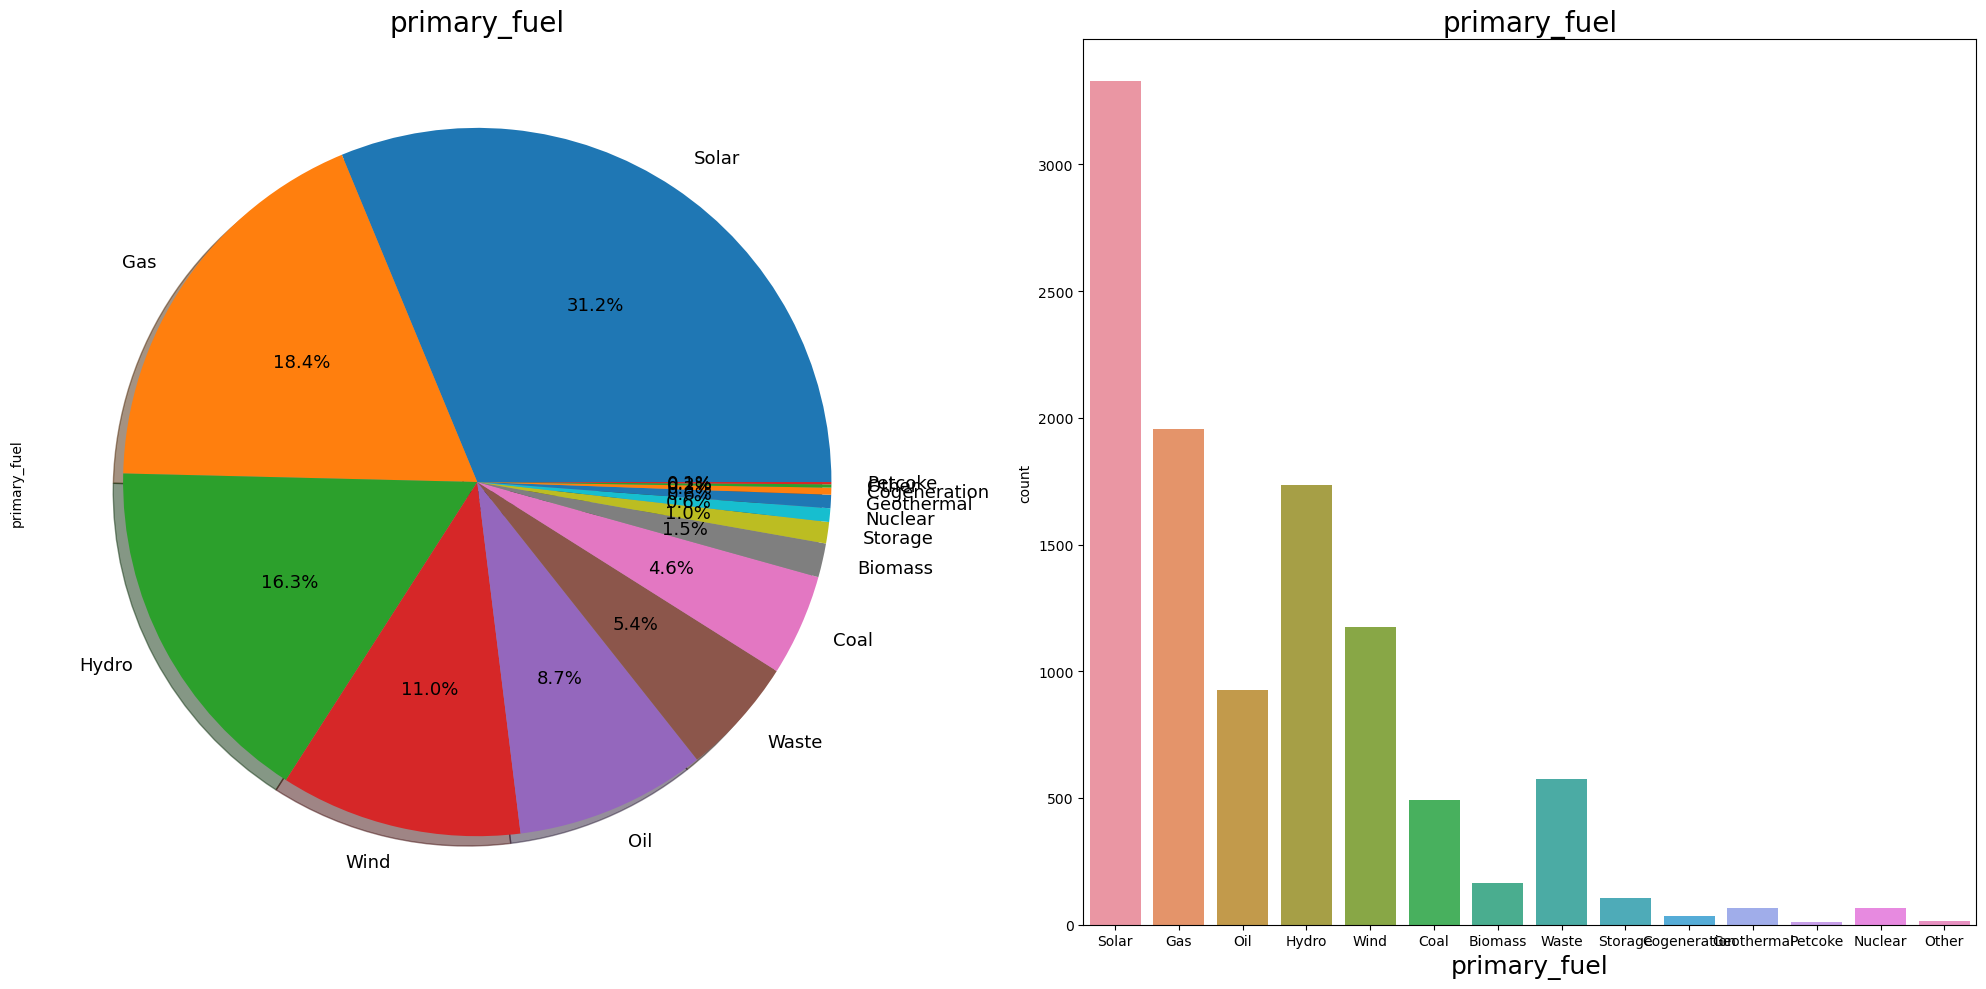

In [29]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(20,10))
df_combined['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',textprops ={ 'fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20)
sns.countplot('primary_fuel',data=df_combined,ax=ax[1])
ax[1].set_title('primary_fuel',fontsize=20)
ax[1].set_xlabel("primary_fuel",fontsize=18)
plt.show()

In [31]:
df_combined.primary_fuel.value_counts()

Solar           3327
Gas             1956
Hydro           1736
Wind            1175
Oil              927
Waste            573
Coal             493
Biomass          165
Storage          104
Nuclear           66
Geothermal        65
Cogeneration      34
Other             16
Petcoke           11
Name: primary_fuel, dtype: int64

* Solar is used as primary fuel in maximum power plant followed by Hydro energy based power plant.
* There are only 66 nuclear based power plant which are usually build to possess high capacity.
* Now, we will check the total energy capacity of all power plants.

In [33]:
print("Total Power Generation of all power plant:",df_combined['capacity_mw'].sum(),'MW')

Total Power Generation of all power plant: 1519361.338 MW


In [37]:
# Grouping and aggregating by primary_fuel, summing capacity_mw
sum_of_fuel_consumption = df_combined.groupby('primary_fuel')['capacity_mw'].sum()

# Sorting by summed capacity in descending order
sum_of_fuel_consumption = sum_of_fuel_consumption.sort_values(ascending=False)

# Displaying the result
print(sum_of_fuel_consumption)


primary_fuel
Gas             583859.566
Coal            462115.800
Hydro           152279.620
Nuclear         111013.100
Wind            107159.670
Solar            40159.560
Oil              38870.230
Waste             9879.292
Biomass           5343.700
Geothermal        3889.200
Petcoke           2361.600
Cogeneration      1042.000
Storage            815.600
Other              572.400
Name: capacity_mw, dtype: float64


* Maximum is from gas and coal and that is more than (Hydro, Nuclear, Wind).

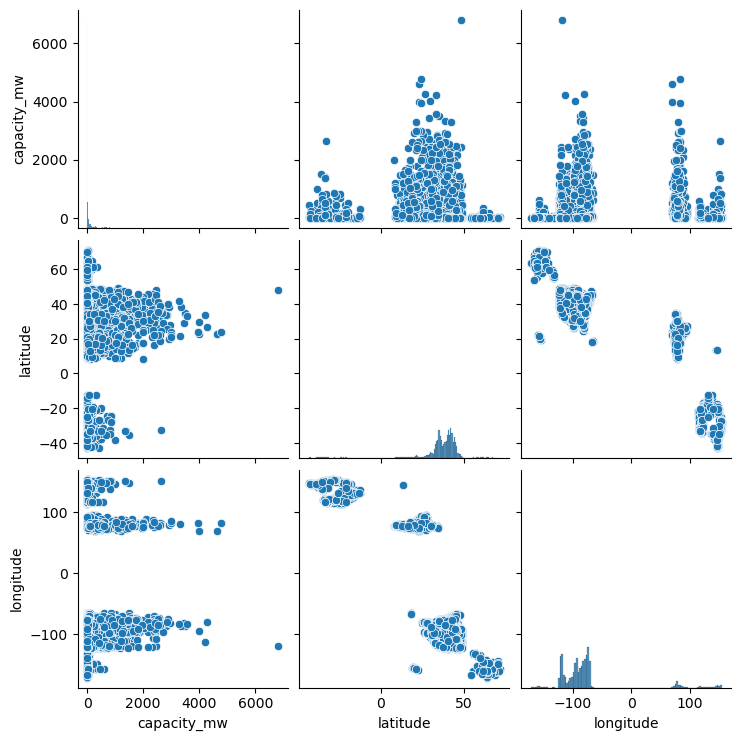

In [39]:
# EDA (Example: plotting distributions, correlations)
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_combined[['capacity_mw', 'latitude', 'longitude', 'primary_fuel']])
plt.show()

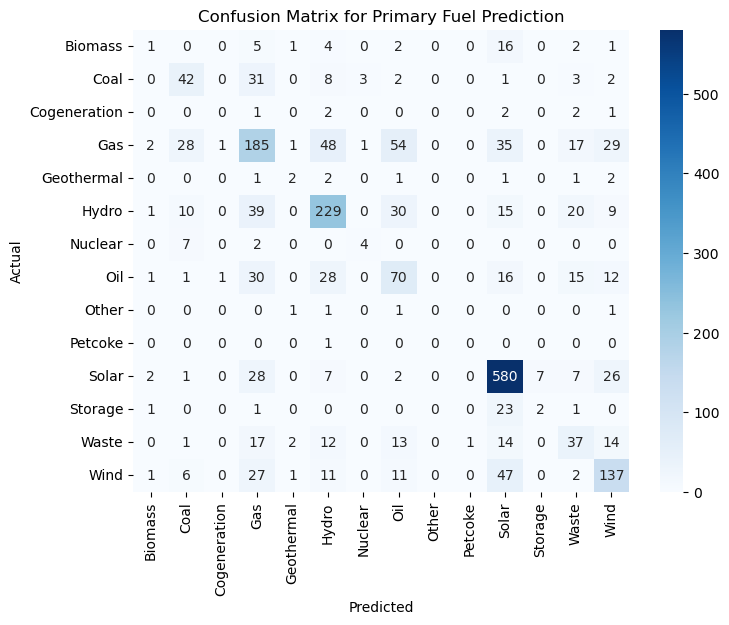

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_primary_fuel)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Primary Fuel Prediction')
plt.show()


## Regression Plot

* Create a scatter plot to visualize the predicted values versus the actual values for capacity_mw prediction (RandomForestRegressor).

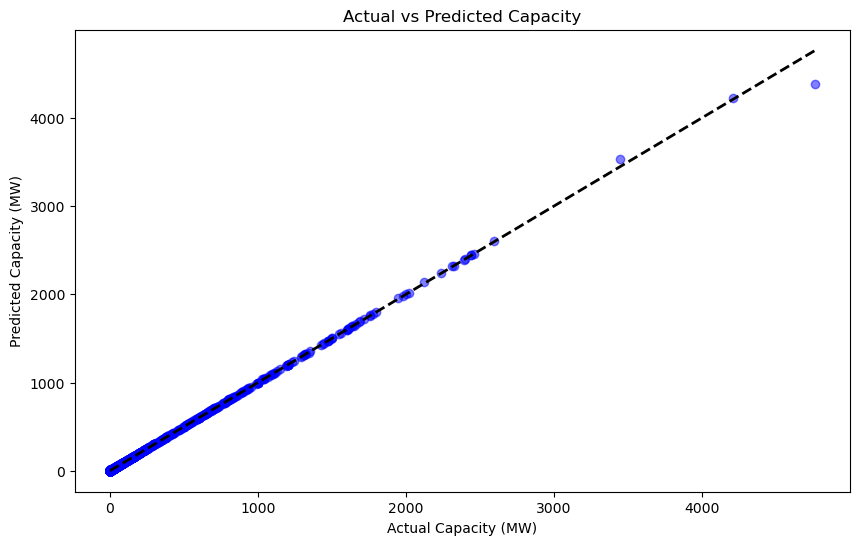

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_cap, y_pred_capacity, color='blue', alpha=0.5)
plt.plot([y_test_cap.min(), y_test_cap.max()], [y_test_cap.min(), y_test_cap.max()], 'k--', lw=2)
plt.xlabel('Actual Capacity (MW)')
plt.ylabel('Predicted Capacity (MW)')
plt.title('Actual vs Predicted Capacity')
plt.show()


## Feature Importance Plot

For both classification and regression tasks, you can plot the feature importances to understand which features (capacity_mw, commissioning_year, etc.) are most influential in making predictions.
Example for RandomForestClassifier

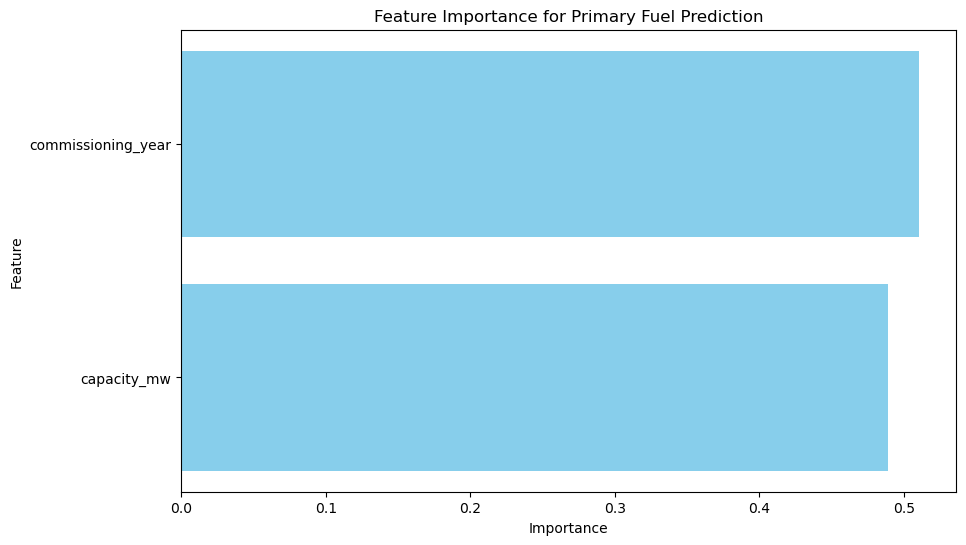

In [7]:
feature_importances = clf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Primary Fuel Prediction')
plt.show()


## Model Training and Prediction:

In [40]:
# Feature selection
features = ['capacity_mw', 'commissioning_year']

# Primary Fuel prediction
X = df_combined[features]
y_primary_fuel = df_combined['primary_fuel']

X_train, X_test, y_train, y_test = train_test_split(X, y_primary_fuel, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_primary_fuel = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_primary_fuel)
print(f'Primary Fuel Prediction Accuracy: {accuracy}')

# Capacity prediction
y_capacity = df_combined['capacity_mw']

X_train_cap, X_test_cap, y_train_cap, y_test_cap = train_test_split(X, y_capacity, test_size=0.2, random_state=42)

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_cap, y_train_cap)
y_pred_capacity = reg.predict(X_test_cap)
mse = mean_squared_error(y_test_cap, y_pred_capacity)
print(f'Capacity Prediction MSE: {mse}')

Primary Fuel Prediction Accuracy: 0.6051643192488263
Capacity Prediction MSE: 69.46851533903431


## Conclusion


**Based on the metrics obtained from predictions:**

* Primary Fuel Prediction Accuracy: The model achieves an accuracy of approximately 60.5% in predicting the primary fuel type of power plants. This means that for about 60.5% of the power plants in the test dataset, the model correctly identifies their primary fuel type.

* Capacity Prediction MSE: The mean squared error (MSE) for capacity prediction is around 69.47. This indicates that, on average, the squared difference between the predicted and actual capacities of power plants is 69.47 megawatts.

**Conclusion:**

Based on these results

* Primary Fuel Prediction: The model shows moderate performance in predicting the primary fuel type of power plants. A 60.5% accuracy suggests that the model is able to capture a significant portion of the variation in primary fuel types across the dataset. However, there is room for improvement, as around 39.5% of predictions are incorrect. Further refinement of features, model tuning, or exploring different algorithms could potentially improve prediction accuracy.

* Capacity Prediction: The model's performance in predicting capacity, as indicated by an MSE of 69.47, suggests that it can estimate power plant capacities relatively well. However, the MSE value should be interpreted in the context of the scale of capacity values and the specific requirements of the application. Lowering the MSE further would indicate more precise predictions of capacity.

**Future Steps:**
Conduct further analysis to understand the specific factors influencing primary fuel types and power plant capacities.
Implement improvements based on insights gained from misclassifications or prediction errors.
Validate the model's performance on additional datasets or using cross-validation techniques to assess robustness.
By critically evaluating these aspects and taking appropriate actions, you can iteratively enhance the predictive capabilities of your models for the Global Power Plant Database. Each step should aim to align with the overarching goals of your analysis and improve the practical utility of the predictions in real-world applications.